# **HW4: $t$-Testing Several Contrasts**

### 17 November 2020
### Seung Kim

**1. A researcher has conducted a five-group study. She plans to test the following pairwise comparisons: $μ_1$ vs $μ_2$, $μ_2$ vs. $μ_3$, and $μ_4$ vs. $μ_5$.**

**a. What multiple comparison procedure should be used to maintain the $α_{EW}$ level at .05?**

**Solution.** In short, we want to use the **Bonferroni adjustment** to account for the excess Type I error introduced by having multiple comparisons. 

This is a **planned contrast** because the experimenter is planning to test, and presumably has not looked at, the data. We have the following contrasts:

* $\psi_1 = \mu_1-\mu_2$, 
* $\psi_2 = \mu_2-\mu_3$, and 
* $\psi_3 = \mu_4-\mu_5$,

**which do not form an orthogonal set, but I'm going to go ahead with the assumption that that's fine for this assignment.**

If we pretend these contrasts are orthogonal and test each of these contrasts with $\alpha=0.05$, the probability of making at least one Type I error (false positive) works out to be:

$$1-(1-\alpha)^C = 1-(1-0.05)^3 = 0.143$$

And 0.143 is much too high. 

$\alpha_{EW}$ is the **experimental error**, the probability that a given experiment (consisting of many contrasts) would contain at least one Type I error (false positive) if we replicated an experiment many times. 

$$\alpha_{EW} = \frac{\text{number of experiments with }\geq 1\text{ Type I error}}{\text{total number of experiments}}$$

If we computed $F_{contrast}$ now, the resulting $\alpha_{EW}$ will be exaggerated (0.143) since we have not yet accounted for the increase in Type I error due to there being multiple comparisons.

The **Bonferroni adjustment** is an easy way to figure out how much to lower $\alpha_{PC}$ (error rate per comparison) to maintain $\alpha_{EW} = 0.05$. In our case, since we have three contrasts and a desired $\alpha_{EW} = 0.05$,

$$\alpha_{PC} = \frac{0.05}{3} = 0.0167$$

And we can use this value instead of $\alpha =0.05$ when we look up our $F$ statistic.

**b. What will the critical $F$ value be for each contrast if there are 13 participants per group?**

**Solution.** Since 

* $\alpha_{PC} = 0.0167$ as calculated in (1a),
* $df_{within} = 65-5 = 60$, since we estimate five parameters ($\mu_1$ through $\mu_5$) in the full model (all means are different),
* $df_{between} = 61-60 = 1$, since we estimate four parameters for each contrast for the restricted model (all means are different except the groups under contrast), 

We obtain 

$$F_{0.0167; 1, 60} = 6.062$$

which is noticeably more extreme than the unadjusted $F_{0.05; 1, 60} = 4.001$.

In [1]:
qf(0.0167, 1, 60, lower.tail=FALSE)

[1] 6.062243

In [2]:
qf(0.05, 1, 60, lower.tail=FALSE)

[1] 4.001191

**c. Suppose that after looking at the data, the researcher decides to replace the comparison of $μ_2$ vs. $μ_3$ with a comparison of $μ_3$ vs. $μ_4$. What multiple comparison procedure should be used to maintain the $α_{EW}$ level at 
.05?**

**Solution.** If we wanted to make all possible comparisons, Tukey's HSD would be more powerful than the Bonferroni adjustment since the latter tends to be a bit too conservative (i.e. the $F$ statistic gets to be a bit too extreme). But even if we have fewer comparisons, it is appropriate to use **Tukey's HSD** when we are dealing with unplanned pairwise comparisons (as we do here). 

**d. What will the critical $F$ value be in part (c) if there are 13 subjects per group?**

**Solution.** Since

* $q= 3.977$ according to `qtukey()` with $df_{within} = 60$ and $a = 5$, 

$$F_{HSD} = \frac{q^2}{2} = \frac{3.977^2}{2} = 7.910$$

In [3]:
qtukey(p = 0.95, nmeans = 5, df = 60)

[1] 3.977418

In [4]:
(qtukey(p = 0.95, nmeans = 5, df = 60)^2)/2

[1] 7.909928

**e. What implications does the difference in critical values you found in parts (b) and (d) have for revising planned comparisons after having examined the data?**

**Solution.** In this case, Tukey's HSD is much more extreme (conservative) compared to the Bonferroni adjustment. The Bonferroni adjustment accounts for the fact that we are only making 3 out of 10 possible pairwise comparisons, while the number of comparisons does not matter for Tukey's HSD. In effect, we pay a lot for revising a planned comparison, in the form of a raised threshold of significance.

One thing to note is that we would expect the Bonferroni adjustment to be more conservative when we do all possible comparisons. If we do all possible comparisons, the Bonferroni $F_{0.05/10} = 8.495$ is indeed more extreme than $F_{HSD} = 7.910$.

In [5]:
qf(0.005, 1, 60, lower.tail=FALSE)

[1] 8.494617

**2. The following data are from a completely randomized between-subjects design:**

In [31]:
library(ggplot2)
library(psych, warn.conflicts=FALSE)
library(multcomp, warn.conflicts=FALSE)

In [7]:
one = c(48, 54, 47, 54, 62, 57)
two = c(59, 46, 49, 63, 38, 58)
three = c(68, 62, 53, 59, 67, 71)
dataset = cbind(one, two, three)
dataset

one,two,three
48,59,68
54,46,62
47,49,53
54,63,59
62,38,67
57,58,71


**Four psychologists analyze this dataset individually, each with different goals in mind. Your task is to duplicate the results obtained by each. You may use R, but make sure that you report the observed and critical values (as if you were doing it by hand) for each part.**

Before we start, let's take a look at the data first:

In [8]:
experiment = data.frame(cbind(c(one, two, three), c(rep(1,6), rep(2,6), rep(3,6))))
names(experiment)[1] = 'obsrvs'
names(experiment)[2] = 'group'

experiment$group = factor(experiment$group)
describeBy(experiment$obsrvs, experiment$group)


 Descriptive statistics by group 
group: 1
   vars n  mean   sd median trimmed  mad min max range skew kurtosis   se
X1    1 6 53.67 5.61     54   53.67 6.67  47  62    15 0.13    -1.66 2.29
------------------------------------------------------------ 
group: 2
   vars n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 6 52.17 9.45   53.5   52.17 9.64  38  63    25 -0.26    -1.77 3.86
------------------------------------------------------------ 
group: 3
   vars n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 6 63.33 6.65   64.5   63.33 6.67  53  71    18 -0.33    -1.65 2.72

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



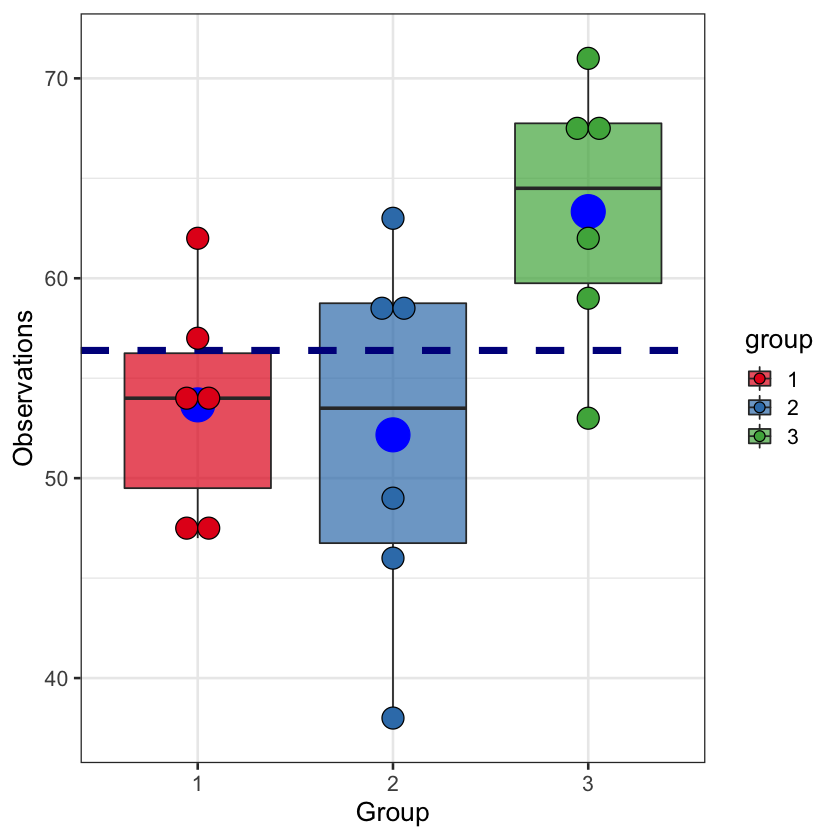

In [9]:
ggplot(experiment, aes(x=factor(group), y=obsrvs, fill=group)) +
    geom_boxplot(alpha=0.7) +
    xlab("Group") +
    ylab("Observations") + 
    stat_summary(fun=mean, geom="point", shape=20, size=14, color="blue", fill="blue") +
    theme(legend.position="none") +
    scale_fill_brewer(palette="Set1") +
    theme_bw(base_size = 16)+
    geom_hline(yintercept= mean(experiment$obsrvs), linetype="dashed", color = "darkblue", size=2) +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=1)

Right off the bat, we can see that Group 3 looks pretty different from Groups 1 & 2.

**a. Psychologist #1 formulates three planned comparisons of interest: Group 1 vs. Group 2, Group 1 vs. Group 3, and Group 2 vs. Group 3. Perform these planned comparisons, assuming homogeneity of variance. Provide observed and critical values.**

**Solution.** Let's first do an omnibus ANOVA test.

In [10]:
full = aov(obsrvs~group, data=experiment)
summary(full)

            Df Sum Sq Mean Sq F value Pr(>F)  
group        2  440.8  220.39   4.005 0.0404 *
Residuals   15  825.5   55.03                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Then we'll articulate the contrasts:

In [11]:
c1 = c(1, -1, 0)
c2 = c(1, 0, -1)
c3 = c(0, 1, -1)

And then we'll run the contrasts using the `multcomp` package. We pay no mind to anything but the $t$ values.

In [25]:
contrasts <- rbind("Group 1 vs. Group 2" = c1,
                   "Group 1 vs. Group 3" = c2,
                   "Group 2 vs. Group 3" = c3)
contrast_mod <- glht(full, linfct = mcp(group = contrasts))
summary(contrast_mod)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = obsrvs ~ group, data = experiment)

Linear Hypotheses:
                         Estimate Std. Error t value Pr(>|t|)  
Group 1 vs. Group 2 == 0    1.500      4.283   0.350   0.9349  
Group 1 vs. Group 3 == 0   -9.667      4.283  -2.257   0.0935 .
Group 2 vs. Group 3 == 0  -11.167      4.283  -2.607   0.0491 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


Now, we can calculate the $F$ statistics for all comparisons by squaring the $t$ values. 

In [13]:
0.35^2     # 1 vs 2
(-2.257)^2 # 1 vs 3
(-2.607)^2 # 2 vs 3

[1] 0.1225

[1] 5.094049

[1] 6.796449

So we have the $F$ statistics for each of the 3 comparisons. Now, we need a critical $F$ value to compare these against. 

My initial impulse was to do a Bonferroni adjustment because we have what seems like a small number of planned contrasts. However, it turns out that 3 comparisons actually constitute all possible pairwise comparisons for 3 groups ($\frac{3\times 2}{2} = 3$). Since we are doing *all* pairwise contrasts and Tukey's HSD can deal with both planned and post hoc comparisons, Tukey's HSD is most appropriate here.

For 3 groups and $df_{within} = 15$, we find that $q = 3.673$ and $F_{HSD} = 6.747$.

In [14]:
q = qtukey(p = 0.95, nmeans = 3, df = 15)
q

[1] 3.673378

In [15]:
F_HSD = (q^2)/2
F_HSD

[1] 6.746852

So it looks like only the third (Group 2 vs. Group 3) contrast is significant, since $F_{\psi_3} = 6.796$ is more extreme than $F_{HSD} = 6.747$. 

In [26]:
TukeyHSD(full, "group")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = obsrvs ~ group, data = experiment)

$group
         diff         lwr       upr     p adj
2-1 -1.500000 -12.6250728  9.625073 0.9349151
3-1  9.666667  -1.4584061 20.791739 0.0936399
3-2 11.166667   0.0415939 22.291739 0.0490903


In [30]:
library(agricolae)
test = HSD.test(full, trt = "group")
test

$statistics
   MSerror Df     Mean       CV      MSD
  55.03333 15 56.38889 13.15586 11.12507

$parameters
   test name.t ntr StudentizedRange alpha
  Tukey  group   3         3.673378  0.05

$means
    obsrvs      std r Min Max   Q25  Q50   Q75
1 53.66667 5.609516 6  47  62 49.50 54.0 56.25
2 52.16667 9.453394 6  38  63 46.75 53.5 58.75
3 63.33333 6.653320 6  53  71 59.75 64.5 67.75

$comparison
NULL

$groups
    obsrvs groups
3 63.33333      a
1 53.66667     ab
2 52.16667      b

attr(,"class")
[1] "group"

Just to check, I conducted the Bonferroni adjustment, and found that it is more conservative than Tukey's HSD, as expected. None of the contrasts are significant under Bonferroni (i.e. all $F_\psi < F_{0.0167;1,15} = 7.251$):

In [16]:
qf(0.0167, 1, 15, lower.tail=FALSE)

[1] 7.250862

**b. Psychologist #2 has no a priori comparisons, so she first performs the omnibus test. Following this, all pairwise comparisons are tested for significance, assuming homogeneity of variance. Provide observed and critical values.**

**Solution.** We would follow the same procedure in (2a), obtain the same $F_{HSD} = 6.747$ and find only the third contrast (2 vs 3) as significant. This is because Tukey's HSD works for both planned and post hoc comparisons as long as we are making all possible pairwise comparisons. 

*This is something that doesn't quite make sense to me—so, if we do all pairwise comparisons, does it not matter whether they are planned or post hoc? Do we not pay any penalties for conducting post hoc comparisons, as long as we do all pairwise comparisons? Should I have done a Fisher's LSD?*

**c. Psychologist #3 differs from Psychologist #2 only in that she decides post hoc to test not only all pairwise comparisons, but also the average of Groups 1 and 2 vs. Group 3. Like Psychologist #2, she assumes homogeneity of variance. Provide observed and critical values.**

**Solution.** Since we have a complex comparison among our comparisons, and since all our comparisons are *post hoc*, Scheffé's method is most appropriate (if the comparisons were planned, Bonferroni would be better).

Let's run the comparisons first. Here are the contrasts:

In [17]:
c1 = c(1, -1, 0)
c2 = c(1, 0, -1)
c3 = c(0, 1, -1)
c4 = c(0.5, 0.5, -1)

We want to get the $t$ values from here:

In [18]:
contrasts <- rbind("Group 1 vs. Group 2" = c1,
                   "Group 1 vs. Group 3" = c2,
                   "Group 2 vs. Group 3" = c3,
                  "Groups 1 & 2 vs. Group 3" = c4)
contrast_mod <- glht(full, linfct = mcp(group = contrasts))
summary(contrast_mod)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = obsrvs ~ group, data = experiment)

Linear Hypotheses:
                              Estimate Std. Error t value Pr(>|t|)  
Group 1 vs. Group 2 == 0         1.500      4.283   0.350   0.9364  
Group 1 vs. Group 3 == 0        -9.667      4.283  -2.257   0.0982 .
Group 2 vs. Group 3 == 0       -11.167      4.283  -2.607   0.0520 .
Groups 1 & 2 vs. Group 3 == 0  -10.417      3.709  -2.808   0.0356 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


And obtain the $F$ statistics for all contrasts by squaring their $t$ values:

In [19]:
0.350^2    # 1 vs 2
(-2.257)^2 # 1 vs 3
(-2.607)^2 # 2 vs 3
(-2.808)^2 # 1&2 vs 3

[1] 0.1225

[1] 5.094049

[1] 6.796449

[1] 7.884864

Now, we can calculate our critical $F_{Scheffé}$. Since we have:

* $a = 3$ (3 groups)
* $N = 18$ (6 observations per group),

$$F_{Scheffé} = (a-1)F_{0.05;a-1,N-a} = (3-1)F_{0.05;3-1,18-3} = 2F_{0.05;2,15} = 7.365$$

In [20]:
2*qf(0.05, 2, 15, lower.tail=FALSE)

[1] 7.364641

It looks like only the fourth contrast (Groups 1 & 2 vs. Group 3) is significant ($F_{\psi_4} =7.884 > F_{Scheffé} = 7.365$).

**d. Psychologist #4 performs the same tests as Psychologist #3; however, Psychologist #4 has planned to conduct these particular tests prior to examining the data. Homogeneity is assumed. Provide observed and critical values.**

**Solution.** Even though the comparisons are the same as (2c), because our comparisons were *planned*, the Bonferroni adjustment is most appropriate. 

Since $\alpha_{PC} = \frac{0.05}{4} = 0.0125$, $F_{0.0125; 1, 15} = 8.046$.

In [34]:
qf(0.05/4, 1, 15, lower.tail=FALSE)

[1] 8.046455

If we use the Bonferroni adjustment, *none* of the 4 contrasts are significant! This is puzzling because, according to the lectures, Scheffé's method tends to be more conservative than the Bonferroni adjustment.

**e. Write a brief explanation (1-2 paragraphs) of why the various psychologists did not all arrive at the same conclusions regarding group differences. You need not specify one approach as “best,” but you should explain the patterns of findings for these data. Also, you need not discuss all findings in relationship to one another; instead, focus your attention on differences that emerge and the reasons for such differences.**

**Solution.** First, looking at (2a) and (2b), both arrived at the same conclusion because both used the same exact Tukey's HSD adjustment. It looks like Tukey's HSD does not care whether its pairwise comparisons are planned or post hoc, as long as *all* pairwise comparisons are made. We *could* have gone with Bonferroni for (2a) since all comparisons were planned, but it would have incurred an overly conservative critical $F$ value since we made all possible pairwise comparisons—if we had made only 2 pairwise comparisons, then we would have had a less conservative and more powerful Bonferroni adjustment ($F_{0.025;1,15} = 6.200$) compared to Tukey's HSD ($F_{HSD} = 6.747$).

In [35]:
qf(0.025, 1, 15, lower.tail=FALSE)

[1] 6.199501

Second, looking at (2c) and (2d), Scheffé's method (complex, post hoc) found the fourth contrast significant, while the Bonferroni adjustment (complex, planned) found *none* of the contrasts significant. This was puzzling at first because Scheffé's method is generally more conservative and less powerful than Bonferroni. However, after consulting the table in the book (Table 5.9, p. 244), I realized that, for $a=3$ and $df_{within}=15$, the maximum number of contrasts we should use Bonferroni on is 3. In fact, if we make only 3 comparisons, the Bonferroni critical value is more powerful than Scheffé's ($F_{0.05/3;1,15} = 7.256 < F_{Scheffé} = 7.365$), as we would expect. But we made 4 comparisons, which exceeded the advised maximum number of comparisons, so we ended up with a very large Bonferroni $F$. I should have gone with Scheffé's method for both (2c) and (2d). 

In [36]:
qf(0.05/3, 1, 15, lower.tail=FALSE)

[1] 7.256232

Finally, it's interesting that Tukey's HSD was lower (6.747) compared to the other critical $F$ values. Is it that adding on a complex comparison imposes a higher critical value to meet (a penalty)? 